Importing the Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf

Data Collection and Processing

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('car data.csv')

In [3]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [8]:
# encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [10]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = car_dataset['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

Feature Scaling


In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Initializing the ANN. Adding the input layer, first hidden layer and output layer

In [15]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [16]:
def r_squared(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - (ss_res / (ss_tot + tf.keras.backend.epsilon()))

In [17]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [r_squared])
history = ann.fit(X_train, y_train, batch_size=32, epochs=500, verbose=1)


Epoch 1/500
9/9 [==============================] - 1s 4ms/step - loss: 55.4932 - r_squared: -1.3313
Epoch 2/500
9/9 [==============================] - 0s 3ms/step - loss: 54.8243 - r_squared: -1.3388
Epoch 3/500
9/9 [==============================] - 0s 3ms/step - loss: 54.2529 - r_squared: -1.1322
Epoch 4/500
9/9 [==============================] - 0s 4ms/step - loss: 53.6171 - r_squared: -1.2408
Epoch 5/500
9/9 [==============================] - 0s 4ms/step - loss: 53.0275 - r_squared: -1.1509
Epoch 6/500
9/9 [==============================] - 0s 4ms/step - loss: 52.4492 - r_squared: -1.3460
Epoch 7/500
9/9 [==============================] - 0s 3ms/step - loss: 51.8647 - r_squared: -1.0777
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 51.3124 - r_squared: -0.9882
Epoch 9/500
9/9 [==============================] - 0s 3ms/step - loss: 50.7548 - r_squared: -1.0231
Epoch 10/500
9/9 [==============================] - 0s 3ms/step - loss: 50.2158 - r_squared: -1.1211

Epoch 83/500
9/9 [==============================] - 0s 3ms/step - loss: 3.4682 - r_squared: 0.8598
Epoch 84/500
9/9 [==============================] - 0s 4ms/step - loss: 3.3899 - r_squared: 0.8348
Epoch 85/500
9/9 [==============================] - 0s 3ms/step - loss: 3.3341 - r_squared: 0.8655
Epoch 86/500
9/9 [==============================] - 0s 3ms/step - loss: 3.2468 - r_squared: 0.8511
Epoch 87/500
9/9 [==============================] - 0s 3ms/step - loss: 3.1848 - r_squared: 0.8837
Epoch 88/500
9/9 [==============================] - 0s 3ms/step - loss: 3.1225 - r_squared: 0.8695
Epoch 89/500
9/9 [==============================] - 0s 3ms/step - loss: 3.0640 - r_squared: 0.8115
Epoch 90/500
9/9 [==============================] - 0s 3ms/step - loss: 3.0047 - r_squared: 0.8808
Epoch 91/500
9/9 [==============================] - 0s 3ms/step - loss: 2.9485 - r_squared: 0.8355
Epoch 92/500
9/9 [==============================] - 0s 3ms/step - loss: 2.9019 - r_squared: 0.8811
Epoch 93/5

9/9 [==============================] - 0s 3ms/step - loss: 1.4394 - r_squared: 0.9429
Epoch 166/500
9/9 [==============================] - 0s 3ms/step - loss: 1.4330 - r_squared: 0.9167
Epoch 167/500
9/9 [==============================] - 0s 2ms/step - loss: 1.4308 - r_squared: 0.9456
Epoch 168/500
9/9 [==============================] - 0s 2ms/step - loss: 1.4270 - r_squared: 0.9453
Epoch 169/500
9/9 [==============================] - 0s 3ms/step - loss: 1.4144 - r_squared: 0.9415
Epoch 170/500
9/9 [==============================] - 0s 2ms/step - loss: 1.4073 - r_squared: 0.9132
Epoch 171/500
9/9 [==============================] - 0s 3ms/step - loss: 1.4032 - r_squared: 0.9467
Epoch 172/500
9/9 [==============================] - 0s 3ms/step - loss: 1.3946 - r_squared: 0.9197
Epoch 173/500
9/9 [==============================] - 0s 2ms/step - loss: 1.3898 - r_squared: 0.9359
Epoch 174/500
9/9 [==============================] - 0s 3ms/step - loss: 1.3819 - r_squared: 0.9384
Epoch 175/500


9/9 [==============================] - 0s 2ms/step - loss: 1.0101 - r_squared: 0.9544
Epoch 248/500
9/9 [==============================] - 0s 2ms/step - loss: 1.0063 - r_squared: 0.9594
Epoch 249/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9996 - r_squared: 0.9526
Epoch 250/500
9/9 [==============================] - 0s 2ms/step - loss: 0.9958 - r_squared: 0.9453
Epoch 251/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9910 - r_squared: 0.9475
Epoch 252/500
9/9 [==============================] - 0s 2ms/step - loss: 0.9867 - r_squared: 0.9407
Epoch 253/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9801 - r_squared: 0.9541
Epoch 254/500
9/9 [==============================] - 0s 2ms/step - loss: 0.9752 - r_squared: 0.9583
Epoch 255/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9663 - r_squared: 0.9594
Epoch 256/500
9/9 [==============================] - 0s 3ms/step - loss: 0.9614 - r_squared: 0.9610
Epoch 257/500


9/9 [==============================] - 0s 3ms/step - loss: 0.6900 - r_squared: 0.9559
Epoch 330/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6884 - r_squared: 0.9698
Epoch 331/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6850 - r_squared: 0.9623
Epoch 332/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6839 - r_squared: 0.9630
Epoch 333/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6783 - r_squared: 0.9586
Epoch 334/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6764 - r_squared: 0.9638
Epoch 335/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6731 - r_squared: 0.9662
Epoch 336/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6717 - r_squared: 0.9699
Epoch 337/500
9/9 [==============================] - 0s 2ms/step - loss: 0.6691 - r_squared: 0.9689
Epoch 338/500
9/9 [==============================] - 0s 3ms/step - loss: 0.6661 - r_squared: 0.9685
Epoch 339/500


9/9 [==============================] - 0s 2ms/step - loss: 0.5618 - r_squared: 0.9680
Epoch 412/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5578 - r_squared: 0.9751
Epoch 413/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5572 - r_squared: 0.9716
Epoch 414/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5572 - r_squared: 0.9687
Epoch 415/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5546 - r_squared: 0.9705
Epoch 416/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5548 - r_squared: 0.9657
Epoch 417/500
9/9 [==============================] - 0s 2ms/step - loss: 0.5547 - r_squared: 0.9666
Epoch 418/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5520 - r_squared: 0.9698
Epoch 419/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5511 - r_squared: 0.9695
Epoch 420/500
9/9 [==============================] - 0s 3ms/step - loss: 0.5535 - r_squared: 0.9692
Epoch 421/500


9/9 [==============================] - 0s 3ms/step - loss: 0.4992 - r_squared: 0.9717
Epoch 494/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4967 - r_squared: 0.9720
Epoch 495/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4971 - r_squared: 0.9758
Epoch 496/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4982 - r_squared: 0.9755
Epoch 497/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4952 - r_squared: 0.9774
Epoch 498/500
9/9 [==============================] - 0s 2ms/step - loss: 0.4965 - r_squared: 0.9717
Epoch 499/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4948 - r_squared: 0.9773
Epoch 500/500
9/9 [==============================] - 0s 3ms/step - loss: 0.4959 - r_squared: 0.9765


In [18]:
y_pred = ann.predict(X_test)

1/1 [==============================] - 0s 126ms/step


In [19]:
y_pred = y_pred.flatten()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

Mean Absolute Error (MAE): 0.5435839064275064
Mean Squared Error (MSE): 0.47925190002035173
Root Mean Squared Error (RMSE): 0.6922802178456002
R-squared (R²): 0.9635738566314165


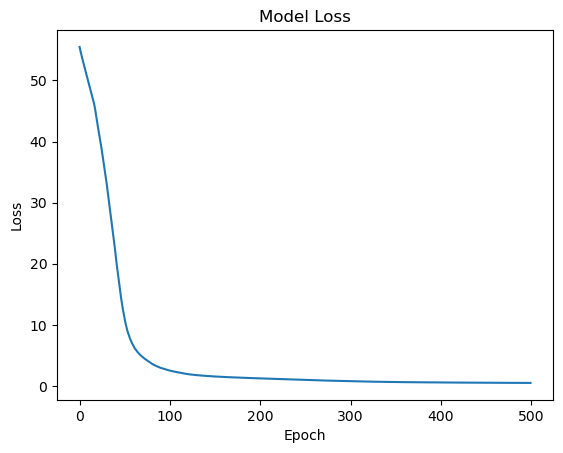

In [21]:
import seaborn as sns

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Plot training history
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
